# Описание метрических переменных и корреляции

In [60]:
metric_vars = ['price', 'owner_count', 'engine_volume_liters', 'power_in_hp', 'mileage', 'mileage_per_year']
import pandas as pd

data = pd.read_csv('extended_data.csv', sep = ';', index_col=0)

In [61]:
for var in metric_vars:
    print(var)
    print("median: ", data[var].median())
    print(data[var].describe())
    print("_____________________")

price
median:  3390000.0
count    1.502900e+04
mean     5.445201e+06
std      5.926867e+06
min      3.000000e+04
25%      1.800000e+06
50%      3.390000e+06
75%      6.700000e+06
max      1.000000e+08
Name: price, dtype: float64
_____________________
owner_count
median:  3.0
count    10948.000000
mean         3.326909
std          2.582466
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         23.000000
Name: owner_count, dtype: float64
_____________________
engine_volume_liters
median:  2.0
count    14793.000000
mean         2.506530
std          0.825089
min          0.600000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.600000
Name: engine_volume_liters, dtype: float64
_____________________
power_in_hp
median:  224.0
count    14819.000000
mean       245.575140
std        107.172489
min         34.000000
25%        184.000000
50%        224.000000
75%        286.000000
max       1200.000000
Name: power_in

In [62]:
# Проведение теста Колмогорова-Смирнова для проверки нормальности
from scipy import stats


vars_normal_dict = dict()
for x in metric_vars:
    stat, p_value = stats.kstest(data.dropna(subset=[x])[x], 'norm', args=(data[x].mean(), data[x].std()))
    vars_normal_dict[x] = {"stat": stat, "p_value": p_value}

pd.DataFrame.from_dict(vars_normal_dict)

,price,owner_count,engine_volume_liters,power_in_hp,mileage,mileage_per_year
stat,0.193456,0.202267,0.247702,0.167191,1.293014e-01,6.916734e-02
p_value,0.000000,0.000000,0.000000,0.000000,2.386274e-216,4.679091e-62


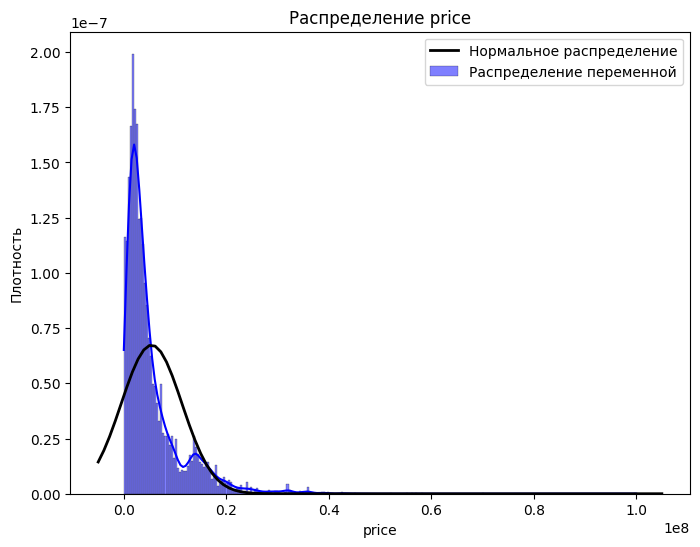

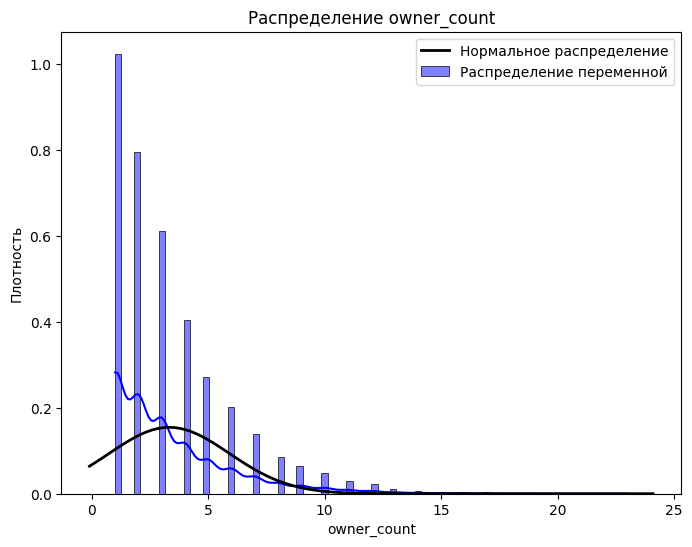

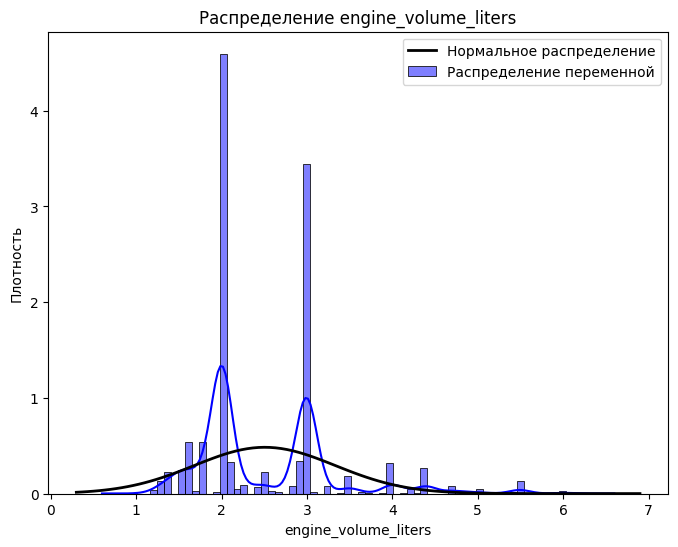

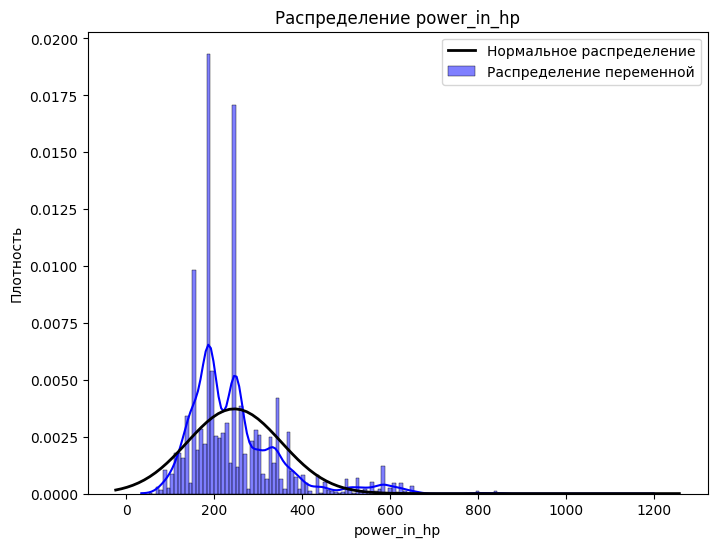

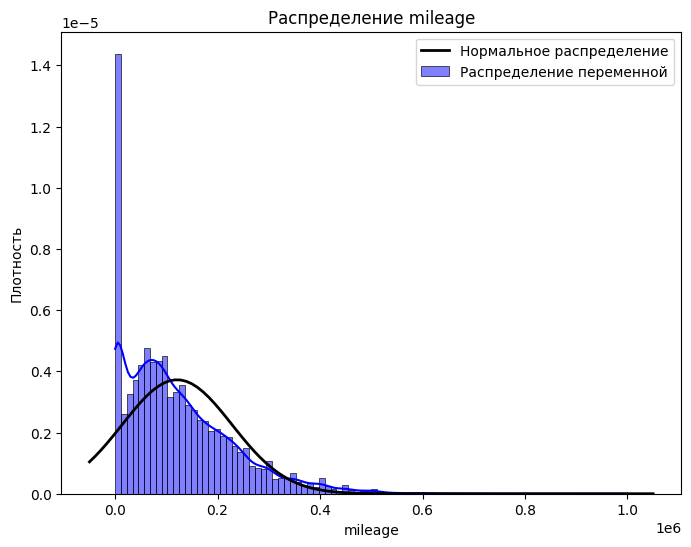

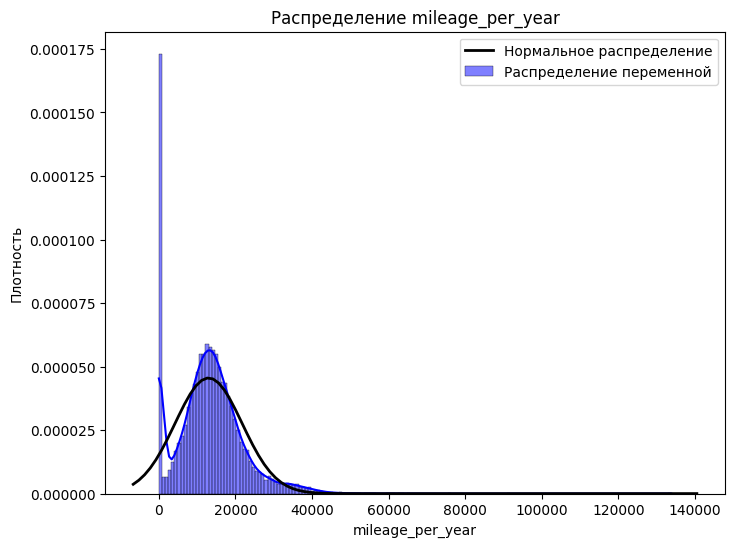

In [63]:
# Построение гистограмм распределения переменных
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import numpy as np


for var in metric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True, color='blue', label='Распределение переменной', stat='density')
    plt.xlabel(var)
    plt.ylabel('Плотность')
    plt.title(f'Распределение {var}')

    # Наложение кривой нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data[var].mean(), data[var].std())
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    plt.legend()
    plt.show()


In [64]:
from IPython.display import Latex

# Проведение теста Колмогорова-Смирнова для проверки нормальности

for x in metric_vars:
    stat, p_value = stats.kstest(data[x], 'norm', args=(data[x].mean(), data[x].std()))
    display(Latex(f'Тест {x}: stat={stat}, p-value={p_value}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Исходя из показателей теста Колмогорова-Смирнова, у всех переменных p_value = 0. Значит, принимаем гипотезу, что распределение сильно отличается от нормального. Однако это может быть обусловлено размерами выборки. Но если мы взглянем на графики и значения, которые нам выводит value_counts, мы можем заметить, что в действительности, в зависимости от переменной, наблюдается положительная или отрицательная асимметрия у некоторых переменных.

Наблюдается:

    - сдвиг значений переменной year вправо
    - сдвиг значений переменной price влево
    - сдвиг значений числа владельцев влево
    - сдвиг значений пробега влево

Посчитаем коэффициенты корреляции числовых величин, используя коэффициент Спирмена, так как наши переменные не подчиняются закону нормального распределения.

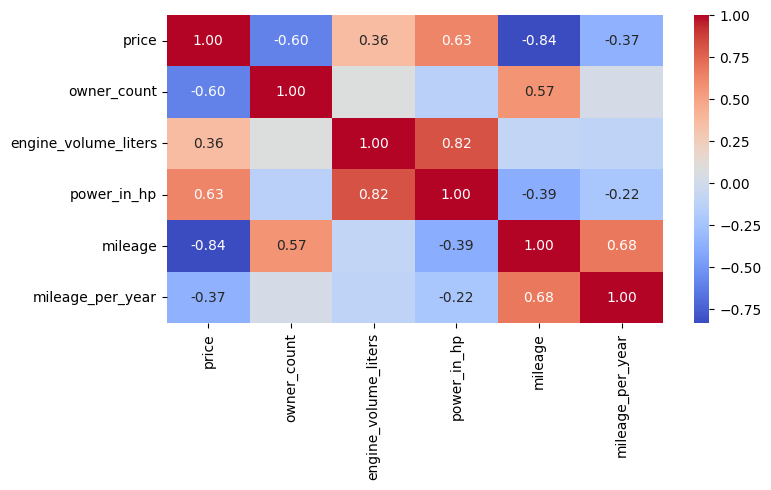

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
ax = sns.heatmap(data[metric_vars].corr(method='spearman'), cmap="coolwarm", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.2 or float(t.get_text()) <= -0.2:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Корреляции:

    - Сильная прямая между объемом двигателя и числом лошадиных сил 
    - Сильная обратная между пробегом и ценой
    - Средняя прямая между пробегом и пробегом за год
    - Средняя прямая между ценой и числом лошадиных сил
    - Средняя прямая между пробегом и количеством владельцев
    - Средняя обратная между ценой и числом владельцев
    - Слабая прямая между ценой и объемом двигателя
    - Слабая обратная между пробегом и числом лошадиных сил
    - Слабая обратная между ценой и пробегом за год
    - Слабая обратная между пробегом за год и числом лошадиных сил